# LOCALIZATION FOR THE NEW RESTAURANT IN PHOENIX

The purpose of this notebook is to discover a good location for the new restaurant in Phoenix. We will approach this analysis both considering success and number of reviews of existing restaurant in Phoenix and evaluating the competence this new restaurant chain will have in the city.<br>

In [53]:
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt

## Localization based on existing data from restaurants in Phoenix

First, we load the data from cleaned_restaurants.csv and filter it by the metropolis of Phoenix.

In [75]:
cleaned_restaurants=pd.read_csv('cleaned_restaurants.csv')

In [76]:

p_metro=cleaned_restaurants[restaurants['state']=='AZ']
p_metro=p_metro[p_metro['latitude']<34]



We will create an objective function in order to catalogue both the success (stars) and number of reviews of the restaurants in phoenix. The function will ponderate by 30% the number of stars normalised and by 70% the number of reviews normalised as we consider more important for a good restaurant prioritize in number of potential customers.

In [58]:
p_metro['objective']=0.3*p_metro['stars']/max(p_metro['stars'])+0.7*p_metro['review_count']/max(p_metro['review_count'])

In [59]:
modeldata=pd.DataFrame()

modeldata['lat']=p_metro['latitude']
modeldata['lon']=p_metro['longitude']

In [60]:
modeldata['rating']=p_metro['stars']#.apply(lambda x: '1' if x>=4 else 0)
modeldata['reviews']=p_metro['review_count']

In [61]:
modeldata.head()

lat         lon  rating  reviews
5   33.602822 -111.983533     4.0       10
11  33.393199 -111.976270     4.0        9
12  33.640391 -112.187028     3.5       12
14  33.394863 -111.756036     3.0       13
16  33.350104 -111.963660     3.0        4

In [62]:
modeldata['objective']=0.3*modeldata['rating']/max(modeldata['rating'])+0.7*modeldata['reviews']/max(modeldata['reviews'])


In [63]:
modeldata.describe()

lat           lon        rating       reviews     objective
count  12124.000000  12124.000000  12124.000000  12124.000000  12124.000000
mean      33.487799   -112.001729      3.428819    114.427994      0.228517
std        0.121441      0.168255      0.827837    192.675892      0.069731
min       33.210781   -112.540321      1.000000      3.000000      0.060597
25%       33.394509   -112.103986      3.000000     15.000000      0.183186
50%       33.479974   -111.978183      3.500000     46.000000      0.227760
75%       33.582542   -111.892342      4.000000    135.250000      0.271394
max       33.844710   -111.600936      5.000000   3515.000000      0.940000

We will now just plot using a heatmap, those restaurants with an objective value higher than 0.55. That would mean that we will just plot those restaurants with the desired combination of reviews and stars.

In [66]:
from folium import plugins
from folium.plugins import HeatMap


heatmap= folium.Map(location=[33.451, -112.0578],
                    zoom_start = 11) 

# Ensure you're handing it floats
modeldataheat=modeldata.copy()
modeldataheat['lat'] = (modeldataheat['lat']).astype(float)
modeldataheat['lon'] = (modeldataheat['lon']).astype(float)


heat_df = modeldataheat[modeldataheat.objective>0.55] 
heat_df = heat_df[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(heatmap)

# Display the map
heatmap

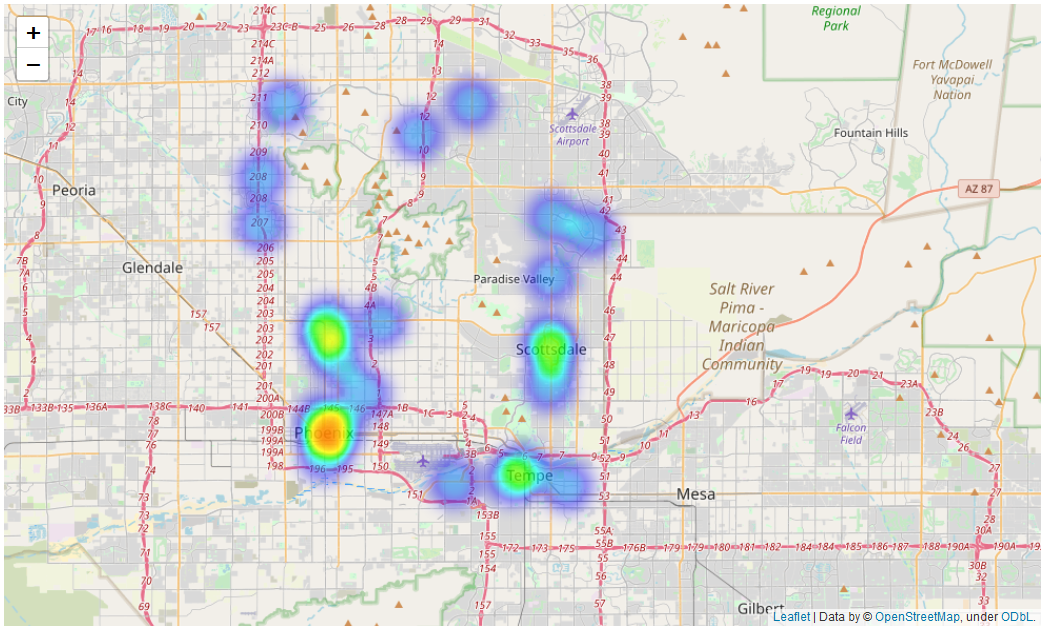

In [67]:
from IPython.display import Image
Image("C:/Users/hecto.DESKTOP-ACA6A3T/Documents/DENMARK/BANALYTICS/2semester/Advance BA/Final Project/FINAL FILES/localization_1.PNG")

As we can see in the heatmap, the best businesses in the metropolis of Phoenix are located in the city center of Phoenix, Scottdale and Tempe. For a first restaurant, it would be better to place it in the city center of Phoenix since it has more customers and visibility.

## Potential Competitors of Banh Mi Boys in Phoenix

Throughout this part, since we have the target customers in Phoenix, we want to visualize where they usually go in order to place the new restaurant next to those places.

In [79]:

business=pd.read_csv('reviews_rest_phoenix_metropolis.csv')
Target_users=pd.read_csv('future_customers.csv')
restaurants=business.merge(cleaned_restaurants,on='business_id',how='left')
restaurants=restaurants[restaurants['categories'].notnull()==True]

In [80]:
customers=Target_users['user_id'].unique()
List_restaurants=(restaurants.groupby(['business_id']).count())
List_restaurants=List_restaurants.rename(columns={'cool': 'Number of reviews'})
List_restaurants=List_restaurants['Number of reviews']
List_restaurants=pd.DataFrame(List_restaurants)
List_restaurants=List_restaurants.reset_index(level=['business_id'])
List_business_id=List_restaurants['business_id']

We will analyze in which restaurants the target users are going, it will inform us, in which area they are likely to go in Phoenix

In [81]:
frequency=[]


for B_id in List_business_id:
    search=restaurants[restaurants['business_id']==B_id]
    users_search=search['user_id'].unique()
    
    rate=0
    for user in users_search:
        if user in customers:
            rate=rate+1
    
    frequency.append(rate)


The frequency, informs us, how many people of our sample of customers have been in each restaurant of Phoenix

In [82]:
List_restaurants['frequency']=frequency
List_restaurants=List_restaurants.sort_values(by=['frequency'],ascending= False )
List_restaurants.head(25)

business_id  Number of reviews  frequency
8454   gQMAcDm8kv8ev7x2BshMwg                944          6
4074   JzOp695tclcNCNMuBl7oxA               2473          6
1777   85o8XAZDoPmRqHFhdJLAGg                343          6
5109   PhMfnMldVKXo7HqHw6DSrg                372          5
4931   OgJ0KxwJcJ9R5bUK0ixCbg               2284          5
10942  thLX_k20SPJ0KyusGTBIHw               1485          5
8063   eS29S_06lvsDW04wVrIVxg               1570          5
5901   U1ZVgF-kfkvv_rcoe0RglQ                313          5
7704   cTJjTKz2huGZ-ElScC2pSw               1280          5
11502  wl0QZqAzr1DelslQ02JGCQ               1728          4
1491   6ZIHxvFTHC1pvAzAS0uLDA                559          4
2582   C8D_GU9cDDjbOJfCaGXxDQ               1768          4
3535   HGuHk935tyokX6kveEviJw                366          4
306    0HgLKI1T9WT3hJXskDtUrQ                248          4
4802   NxjUiGBNgyDErKXnmQ3s3w                800          4
168    -kIscN8I29eXMPkvyyxmRQ                886          4
3020   EV1jAj7NFNmNIqOnwZ4Acw                650          4
1025   46yg8fJ8fVA1QSaaL7XfOw                361          4
6019   UY13CTgUqriT-fMxT2APLw                493          4
7134   _XN-GwzZwAyIqLKJsl2htg               1707          4
10091  p81LV6y6Jxz_q_3HL06jOw                435          3
4953   OoYwJANV9zD-_OA4Atu-gg                730          3
8250   fKlr9qNoV37WQJwQ826POg               1470          3
11809  yNPh5SO-7wr8HPpVCDPbXQ               2399          3
671    2GmGT-7QjowR1ihup3FbVA                896          3

We will only consider the restaurants where our target users have been

In [83]:
List_restaurants2=List_restaurants[List_restaurants['frequency']>0]
List_restaurants2=List_restaurants2.reset_index(drop=True)
List_restaurants2.head()

business_id  Number of reviews  frequency
0  gQMAcDm8kv8ev7x2BshMwg                944          6
1  JzOp695tclcNCNMuBl7oxA               2473          6
2  85o8XAZDoPmRqHFhdJLAGg                343          6
3  PhMfnMldVKXo7HqHw6DSrg                372          5
4  OgJ0KxwJcJ9R5bUK0ixCbg               2284          5

In [84]:
List_restaurants2.describe()

Number of reviews    frequency
count        1208.000000  1208.000000
mean          382.567881     1.264073
std           406.825246     0.659367
min             5.000000     1.000000
25%           119.000000     1.000000
50%           264.500000     1.000000
75%           493.250000     1.000000
max          3608.000000     6.000000

Let's put the localisation of these restaurants.

In [85]:
List_business_id2=List_restaurants2['business_id']
Lat=[]
Long=[]


for B_id in List_business_id2:
    search=restaurants[restaurants['business_id']==B_id]
    lat=search['latitude'].reset_index(drop = True)
    long=search['longitude'].reset_index(drop = True)

    Lat.append(lat[0])
    Long.append(long[0])

List_restaurants2['latitude']=Lat
List_restaurants2['longitude']=Long

In [86]:
List_restaurants2.head()

business_id  Number of reviews  frequency   latitude   longitude
0  gQMAcDm8kv8ev7x2BshMwg                944          6  33.510181 -112.096168
1  JzOp695tclcNCNMuBl7oxA               2473          6  33.419578 -111.915885
2  85o8XAZDoPmRqHFhdJLAGg                343          6  33.478016 -112.254559
3  PhMfnMldVKXo7HqHw6DSrg                372          5  33.394818 -111.940576
4  OgJ0KxwJcJ9R5bUK0ixCbg               2284          5  33.500597 -112.074237

We can now calculate the wheighted average longitude and latitde of these restaurants.

In [87]:
List_restaurants3=List_restaurants2.copy()
List_restaurants3['lat2']=List_restaurants3['frequency']*List_restaurants3['latitude']
mean_lat=List_restaurants3['lat2'].sum()/List_restaurants3['frequency'].sum()
print(mean_lat)
List_restaurants3['long2']=List_restaurants3['frequency']*List_restaurants3['longitude']
mean_long=List_restaurants3['long2'].sum()/List_restaurants3['frequency'].sum()
print(mean_long)

33.490570678962804
-111.99894202453397


Let's now look at all of the restaurants in Phoenix
The file Business_Metropolis can be downloaded by running the notebook: DescripitveAnalysis Yelp Dataset inside: https://github.com/hecmesge/ABA2020

In [88]:
Business=pd.read_excel('Business-Metropolis.xlsx')
Business=Business[Business['categories'].notnull()==True]
Restaurants=Business[Business['categories'].str.contains('Restaurants')]
Restaurants=Restaurants[Restaurants['metropolis']=='Phoenix']
Restaurants.head()

RestaurantsTakeOut  BusinessAcceptsCreditCards  NoiseLevel  GoodForKids  \
877                   1                           1           0            1   
878                   1                           1           0            1   
879                   1                           1          -1            1   
880                   1                           1           0            1   
881                   1                           1           0            1   

     RestaurantsReservations  RestaurantsGoodForGroups  \
877                        0                         1   
878                        0                         1   
879                        0                         1   
880                        0                         1   
881                        1                         1   

     RestaurantsPriceRange2  HasTV  Alcohol  BikeParking  ...  is_open  \
877                       1      0        0            1  ...        1   
878                       1      0        0            1  ...        1   
879                       1      0        0            0  ...        0   
880                       1      1        0            1  ...        0   
881                       2      1        0            0  ...        1   

      latitude   longitude                      name  postal_code  \
877  33.602822 -111.983533         Wetzel's Pretzels        85032   
878  33.458972 -112.047940          Church's Chicken        85006   
879  33.567452 -112.073536               Sam's Gyros        85020   
880  33.611785 -112.110520                Asian Cafe        85023   
881  33.466146 -112.119726  Tacos y Mariscos Sinaloa        85009   

     review_count  stars  state  metropolis  distance metropolis  
877            10    4.0     AZ     Phoenix                  0.0  
878             5    3.5     AZ     Phoenix                  0.0  
879             9    4.0     AZ     Phoenix                  0.0  
880            49    4.0     AZ     Phoenix                  0.0  
881            14    3.0     AZ     Phoenix                  0.0  

[5 rows x 68 columns]

In [89]:
List_business_id2=List_restaurants2['business_id']
Target_Restaurants=Restaurants[Restaurants['business_id'].isin(List_business_id2)]
Target_Restaurants.describe()

RestaurantsTakeOut  BusinessAcceptsCreditCards   NoiseLevel  \
count         1168.000000                 1168.000000  1168.000000   
mean             0.957192                    0.992295    -0.025685   
std              0.202511                    0.087479     0.425443   
min              0.000000                    0.000000    -1.000000   
25%              1.000000                    1.000000     0.000000   
50%              1.000000                    1.000000     0.000000   
75%              1.000000                    1.000000     0.000000   
max              1.000000                    1.000000     2.000000   

       GoodForKids  RestaurantsReservations  RestaurantsGoodForGroups  \
count  1168.000000              1168.000000               1168.000000   
mean      0.858733                 0.407534                  0.913527   
std       0.348446                 0.491586                  0.281181   
min       0.000000                 0.000000                  0.000000   
25%       1.000000                 0.000000                  1.000000   
50%       1.000000                 0.000000                  1.000000   
75%       1.000000                 1.000000                  1.000000   
max       1.000000                 1.000000                  1.000000   

       RestaurantsPriceRange2        HasTV      Alcohol  BikeParking  ...  \
count             1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean                 1.664384     0.721747     1.069349     0.845890  ...   
std                  0.551106     0.448331     0.903854     0.361208  ...   
min                  0.000000     0.000000     0.000000     0.000000  ...   
25%                  1.000000     0.000000     0.000000     1.000000  ...   
50%                  2.000000     1.000000     1.000000     1.000000  ...   
75%                  2.000000     1.000000     2.000000     1.000000  ...   
max                  4.000000     1.000000     2.000000     1.000000  ...   

           dessert       dinner    latenight        lunch      is_open  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.068493     0.613014     0.054795     0.684075     0.823630   
std       0.252698     0.487269     0.227676     0.465082     0.381298   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       0.000000     1.000000     0.000000     1.000000     1.000000   
75%       0.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          latitude    longitude  review_count        stars  \
count  1168.000000  1168.000000   1168.000000  1168.000000   
mean     33.493301  -112.001896    376.785103     3.778682   
std       0.107776     0.135021    395.798837     0.574776   
min      33.246440  -112.415503      6.000000     1.500000   
25%      33.421592  -112.074015    120.000000     3.500000   
50%      33.494221  -111.970399    263.000000     4.000000   
75%      33.578296  -111.922255    482.000000     4.000000   
max      33.832191  -111.682255   3515.000000     5.000000   

       distance metropolis  
count          1168.000000  
mean             13.029105  
std              11.398203  
min               0.000000  
25%               0.000000  
50%              14.809270  
75%              18.964006  
max              35.132503  

[8 rows x 55 columns]

In [90]:
Target_Restaurants.head()

RestaurantsTakeOut  BusinessAcceptsCreditCards  NoiseLevel  GoodForKids  \
883                   1                           1           0            1   
888                   1                           1           0            1   
893                   1                           1           0            0   
914                   1                           1           0            1   
918                   1                           1           0            1   

     RestaurantsReservations  RestaurantsGoodForGroups  \
883                        1                         1   
888                        1                         1   
893                        0                         1   
914                        0                         1   
918                        0                         1   

     RestaurantsPriceRange2  HasTV  Alcohol  BikeParking  ...  is_open  \
883                       2      1        2            1  ...        1   
888                       2      1        2            0  ...        1   
893                       2      1        2            1  ...        0   
914                       2      1        2            0  ...        1   
918                       2      0        1            1  ...        1   

      latitude   longitude                name  postal_code  review_count  \
883  33.479910 -111.982293            Garcia's        85018           139   
888  33.683465 -111.965897          stonegrill        85054            89   
893  33.471988 -112.064807          Rice Paper        85006           445   
914  33.510988 -112.133277  Great Wall Cuisine        85017           557   
918  33.510484 -111.986166        Flower Child        85018           557   

     stars  state  metropolis  distance metropolis  
883    3.0     AZ     Phoenix                  0.0  
888    3.5     AZ     Phoenix                  0.0  
893    3.5     AZ     Phoenix                  0.0  
914    3.5     AZ     Phoenix                  0.0  
918    4.0     AZ     Phoenix                  0.0  

[5 rows x 68 columns]

In [91]:
restaurants_Phoenix_target=Target_Restaurants[Target_Restaurants['distance metropolis']<=90].reset_index(drop = True)
long_target=restaurants_Phoenix_target['longitude']
lat_target=restaurants_Phoenix_target['latitude']

Restaurants only contain all of the restaurants in Phoenix

In [92]:
restaurants_Phoenix=Restaurants[Restaurants['distance metropolis']<=90].reset_index(drop = True)

In [93]:
long_P=restaurants_Phoenix['longitude']
lat_P=restaurants_Phoenix['latitude']

This map shows all of the restaurants in Phoenix (in black), all of the restaurants where our target users have been (in cyan) and the weighted average localisation of these restaurants (regarding the frequency of which our target users have been in these restaurants) in red.

In [94]:
# Phoenix location
lat_Phoenix = 33.4483771
lon_Phoenix = -112.0740373

map_P = folium.Map([lat_Phoenix, lon_Phoenix], zoom_start=10)

for i in range(len(long_P)):
    # Circle marker
    folium.CircleMarker([lat_P[i],long_P[i]], radius=1, color='black').add_to(map_P)
    
for i in range(len(long_target)):
    # Circle marker
    folium.CircleMarker([lat_target[i],long_target[i]], radius=1, color='cyan').add_to(map_P)

folium.CircleMarker([mean_lat,mean_long], radius=3, color='red').add_to(map_P)
    
    
    
map_P

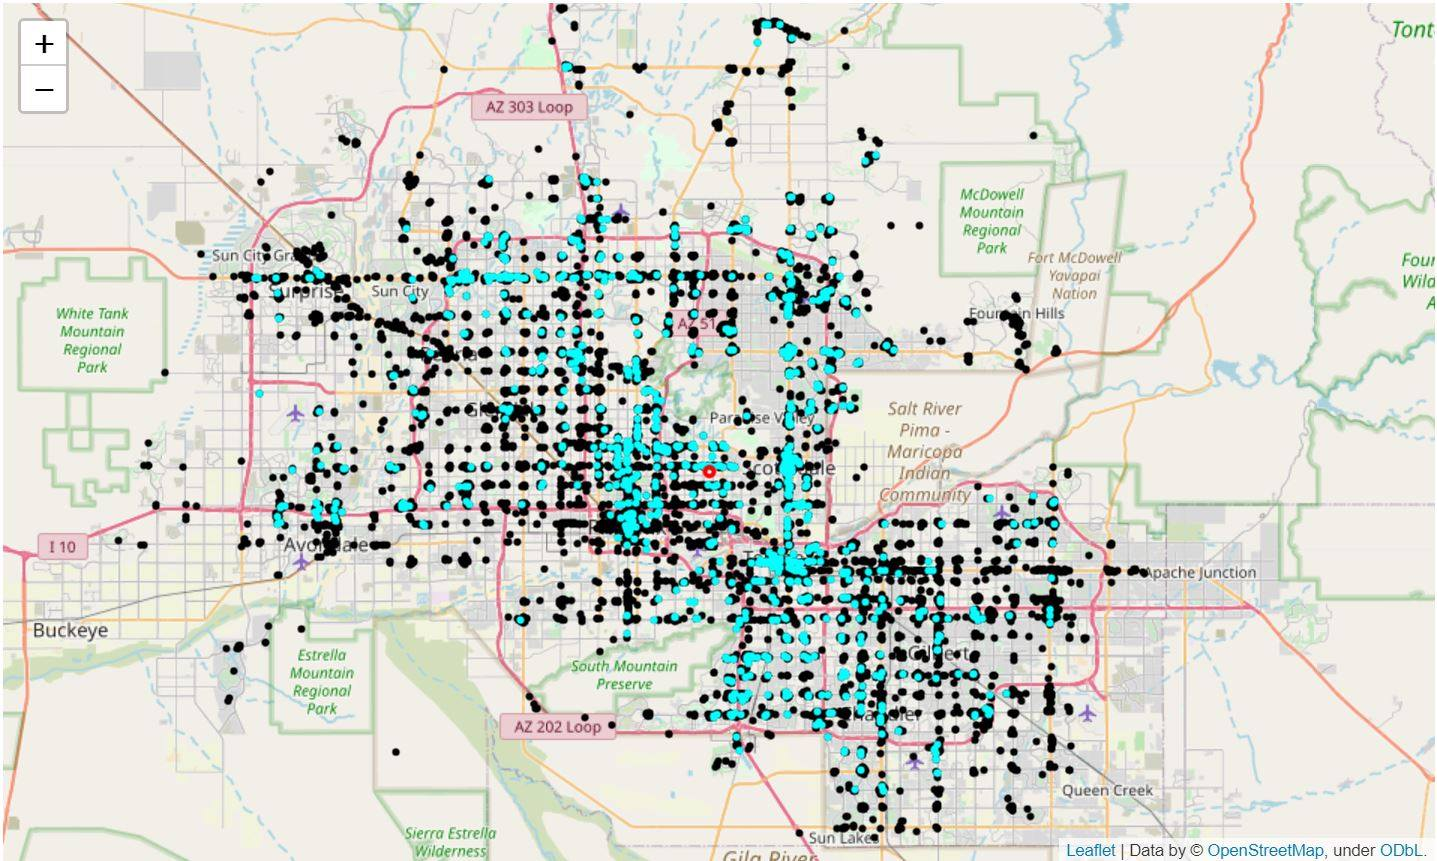

In [95]:
from IPython.display import Image
Image("C:/Users/hecto.DESKTOP-ACA6A3T/Documents/DENMARK/BANALYTICS/2semester/Advance BA/Final Project/FINAL FILES/heat_1.JPG")

The following map is a heat map of the restaurants where our target users have been.

In [96]:
# Phoenix location
lat_Phoenix = 33.4483771
lon_Phoenix = -112.0740373

map_Phoenix = folium.Map([lat_Phoenix, lon_Phoenix], zoom_start=10)


for index, row in List_restaurants2.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=row['frequency'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(map_Phoenix)
    
# convert to (n, 2) nd-array format for heatmap
matrix = List_restaurants2[['latitude', 'longitude']].as_matrix()

# plot heatmap
map_Phoenix.add_children(plugins.HeatMap(matrix, radius=15))
map_Phoenix


C:\Users\hecto.DESKTOP-ACA6A3T\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\hecto.DESKTOP-ACA6A3T\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning:

Method `add_children` is deprecated. Please use `add_child` instead.



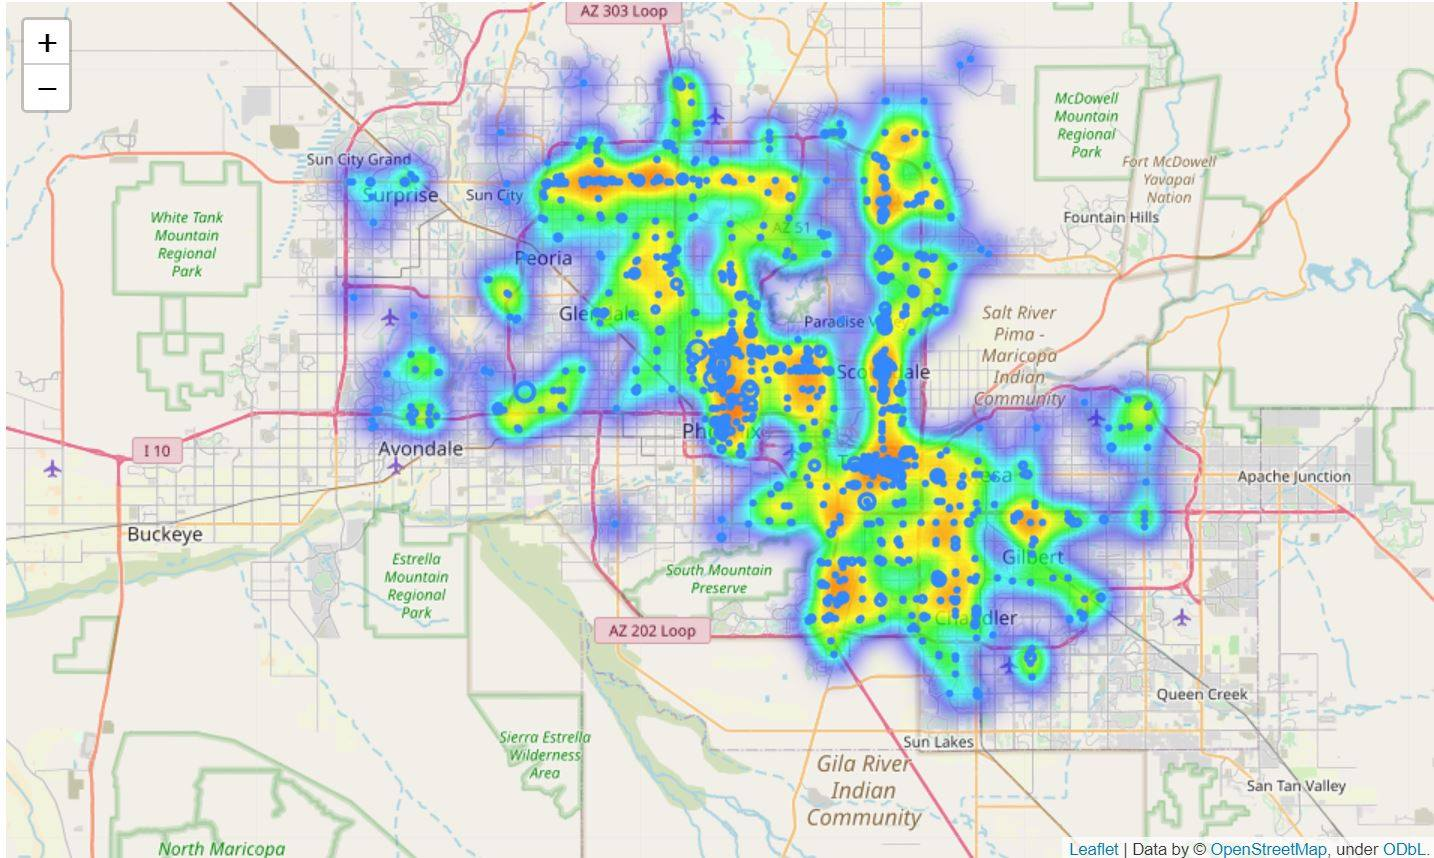

In [97]:
Image("C:/Users/hecto.DESKTOP-ACA6A3T/Documents/DENMARK/BANALYTICS/2semester/Advance BA/Final Project/FINAL FILES/heat_2.JPG")

## Study of the main competitors in Phoenix

In [98]:
List_restaurants2.head(10)

business_id  Number of reviews  frequency   latitude   longitude
0  gQMAcDm8kv8ev7x2BshMwg                944          6  33.510181 -112.096168
1  JzOp695tclcNCNMuBl7oxA               2473          6  33.419578 -111.915885
2  85o8XAZDoPmRqHFhdJLAGg                343          6  33.478016 -112.254559
3  PhMfnMldVKXo7HqHw6DSrg                372          5  33.394818 -111.940576
4  OgJ0KxwJcJ9R5bUK0ixCbg               2284          5  33.500597 -112.074237
5  thLX_k20SPJ0KyusGTBIHw               1485          5  33.499386 -111.926570
6  eS29S_06lvsDW04wVrIVxg               1570          5  33.479016 -112.047963
7  U1ZVgF-kfkvv_rcoe0RglQ                313          5  33.488760 -112.082402
8  cTJjTKz2huGZ-ElScC2pSw               1280          5  33.513575 -112.073381
9  wl0QZqAzr1DelslQ02JGCQ               1728          4  33.423059 -111.951843

In [99]:
competitor1=restaurants_Phoenix[restaurants_Phoenix['business_id']=='JzOp695tclcNCNMuBl7oxA']

In [100]:
competitor1.head()

RestaurantsTakeOut  BusinessAcceptsCreditCards  NoiseLevel  GoodForKids  \
4115                   1                           1           1            1   

      RestaurantsReservations  RestaurantsGoodForGroups  \
4115                        1                         1   

      RestaurantsPriceRange2  HasTV  Alcohol  BikeParking  ...  is_open  \
4115                       2      1        2            1  ...        1   

       latitude   longitude                name  postal_code  review_count  \
4115  33.419578 -111.915885  Four Peaks Brewing        85281          2400   

      stars  state  metropolis  distance metropolis  
4115    4.5     AZ     Phoenix            18.964006  

[1 rows x 68 columns]

In [101]:
Four_Peaks_Brewing=restaurants_Phoenix[restaurants_Phoenix['name']=='Four Peaks Brewing']

In [102]:
Four_Peaks_Brewing.head()

RestaurantsTakeOut  BusinessAcceptsCreditCards  NoiseLevel  GoodForKids  \
4115                   1                           1           1            1   

      RestaurantsReservations  RestaurantsGoodForGroups  \
4115                        1                         1   

      RestaurantsPriceRange2  HasTV  Alcohol  BikeParking  ...  is_open  \
4115                       2      1        2            1  ...        1   

       latitude   longitude                name  postal_code  review_count  \
4115  33.419578 -111.915885  Four Peaks Brewing        85281          2400   

      stars  state  metropolis  distance metropolis  
4115    4.5     AZ     Phoenix            18.964006  

[1 rows x 68 columns]

This first competitor only has one restaurant in Phoenix

In [103]:
competitor2=restaurants_Phoenix[restaurants_Phoenix['business_id']=='85o8XAZDoPmRqHFhdJLAGg']
competitor2.head()

RestaurantsTakeOut  BusinessAcceptsCreditCards  NoiseLevel  GoodForKids  \
1611                   1                           1          -1            1   

      RestaurantsReservations  RestaurantsGoodForGroups  \
1611                        1                         1   

      RestaurantsPriceRange2  HasTV  Alcohol  BikeParking  ...  is_open  \
1611                       2      1        1            1  ...        1   

       latitude   longitude       name  postal_code  review_count  stars  \
1611  33.478016 -112.254559  Song Lynn        85037           332    4.5   

      state  metropolis  distance metropolis  
1611     AZ     Phoenix                  0.0  

[1 rows x 68 columns]

In [104]:
Song_Lynn=restaurants_Phoenix[restaurants_Phoenix['name']=='Song Lynn']
Song_Lynn.head()

RestaurantsTakeOut  BusinessAcceptsCreditCards  NoiseLevel  GoodForKids  \
1611                   1                           1          -1            1   

      RestaurantsReservations  RestaurantsGoodForGroups  \
1611                        1                         1   

      RestaurantsPriceRange2  HasTV  Alcohol  BikeParking  ...  is_open  \
1611                       2      1        1            1  ...        1   

       latitude   longitude       name  postal_code  review_count  stars  \
1611  33.478016 -112.254559  Song Lynn        85037           332    4.5   

      state  metropolis  distance metropolis  
1611     AZ     Phoenix                  0.0  

[1 rows x 68 columns]

In [105]:
competitor3=restaurants_Phoenix[restaurants_Phoenix['business_id']=='gQMAcDm8kv8ev7x2BshMwg']
competitor3.head()

RestaurantsTakeOut  BusinessAcceptsCreditCards  NoiseLevel  GoodForKids  \
1191                   1                           1           0            1   

      RestaurantsReservations  RestaurantsGoodForGroups  \
1191                        0                         1   

      RestaurantsPriceRange2  HasTV  Alcohol  BikeParking  ...  is_open  \
1191                       1      1        0            0  ...        1   

       latitude   longitude       name  postal_code  review_count  stars  \
1191  33.510181 -112.096168  Pho Thanh        85015           898    4.0   

      state  metropolis  distance metropolis  
1191     AZ     Phoenix                  0.0  

[1 rows x 68 columns]

In [106]:
Pho_Thanh=restaurants_Phoenix[restaurants_Phoenix['name']=='Pho Thanh']
Pho_Thanh.head()

RestaurantsTakeOut  BusinessAcceptsCreditCards  NoiseLevel  GoodForKids  \
1191                   1                           1           0            1   

      RestaurantsReservations  RestaurantsGoodForGroups  \
1191                        0                         1   

      RestaurantsPriceRange2  HasTV  Alcohol  BikeParking  ...  is_open  \
1191                       1      1        0            0  ...        1   

       latitude   longitude       name  postal_code  review_count  stars  \
1191  33.510181 -112.096168  Pho Thanh        85015           898    4.0   

      state  metropolis  distance metropolis  
1191     AZ     Phoenix                  0.0  

[1 rows x 68 columns]

Same for Pho Thanh

Let's now only consider the Vietname restaurants in Phoenix that have more than 4 stars and that are inside the list of restaurants visited by our target users. These restaurants are the main Competitors of Banh Mi Boys.

In [107]:
Vietnamese_Phoenix=restaurants_Phoenix[restaurants_Phoenix['categories'].str.contains('Vietnamese')]
Vietnamese_Phoenix2=Vietnamese_Phoenix[Vietnamese_Phoenix['stars']>3.5]
Main_competitors=Vietnamese_Phoenix2[Vietnamese_Phoenix2['business_id'].isin(List_business_id2)]
Main_competitors.head()

RestaurantsTakeOut  BusinessAcceptsCreditCards  NoiseLevel  GoodForKids  \
137                    1                           1           0            1   
803                    1                           1           0            1   
1073                   1                           1           0            1   
1191                   1                           1           0            1   
1378                   1                           1           0            1   

      RestaurantsReservations  RestaurantsGoodForGroups  \
137                         0                         1   
803                         1                         1   
1073                        0                         1   
1191                        0                         1   
1378                        1                         1   

      RestaurantsPriceRange2  HasTV  Alcohol  BikeParking  ...  is_open  \
137                        1      1        0            1  ...        1   
803                        2      1        2            1  ...        1   
1073                       1      0        0            0  ...        1   
1191                       1      1        0            0  ...        1   
1378                       1      1        0            1  ...        1   

       latitude   longitude                       name  postal_code  \
137   33.611452 -112.101480  Pho Vn Vietnamese Cuisine        85023   
803   33.472680 -112.064864          Rice Paper on 7th        85006   
1073  33.479464 -112.152133                     PHO 43        85009   
1191  33.510181 -112.096168                  Pho Thanh        85015   
1378  33.800185 -112.128133           Pho Saigon Pearl        85086   

      review_count  stars  state  metropolis  distance metropolis  
137             96    4.0     AZ     Phoenix                  0.0  
803            180    4.0     AZ     Phoenix                  0.0  
1073           565    4.5     AZ     Phoenix                  0.0  
1191           898    4.0     AZ     Phoenix                  0.0  
1378           141    4.0     AZ     Phoenix                  0.0  

[5 rows x 68 columns]

In [108]:
# Phoenix location
lat_Phoenix = 33.4483771
lon_Phoenix = -112.0740373

m_Phoenix = folium.Map([lat_Phoenix, lon_Phoenix], zoom_start=10)

for index, row in Main_competitors.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=5,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m_Phoenix)
    
# convert to (n, 2) nd-array format for heatmap
matrix = Main_competitors[['latitude', 'longitude']].as_matrix()

# plot heatmap
m_Phoenix.add_children(plugins.HeatMap(matrix, radius=15))


    
m_Phoenix

C:\Users\hecto.DESKTOP-ACA6A3T\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\hecto.DESKTOP-ACA6A3T\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning:

Method `add_children` is deprecated. Please use `add_child` instead.



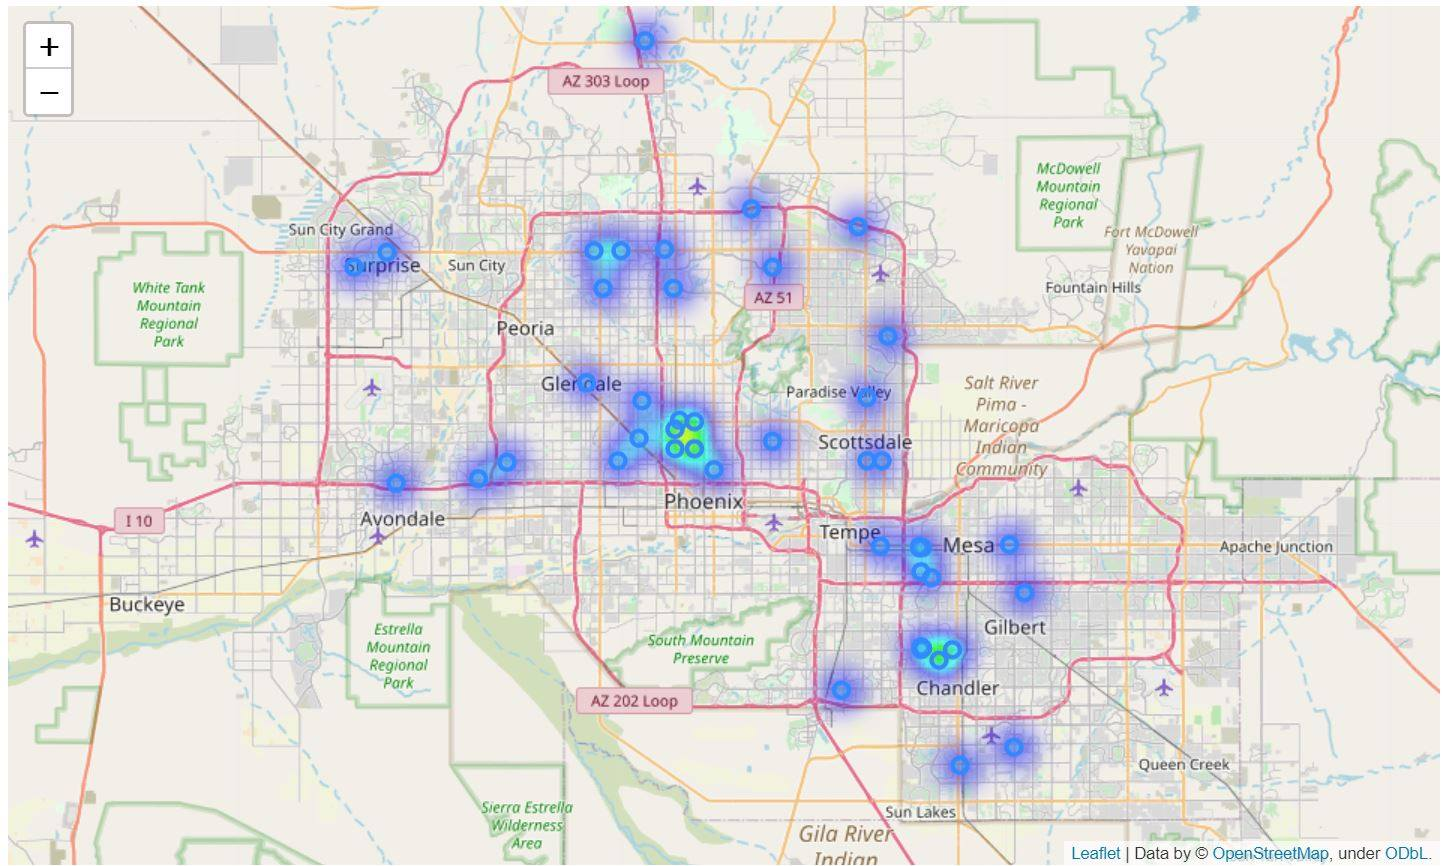

In [109]:
Image("C:/Users/hecto.DESKTOP-ACA6A3T/Documents/DENMARK/BANALYTICS/2semester/Advance BA/Final Project/FINAL FILES/heat_3.JPG")

As we can see, the competitors are less present in the three areas where the demand for restaurants is really high. Near Scottsdale, Phoenix and Tempe.